# Анализ данных пульса с шагом в 1 минуту из приложения Zepp

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
df = pd.read_csv('Zepp stats/HEARTRATE_AUTO_1708279838987.csv')
df = df.append(pd.read_csv('Zepp stats/HEARTRATE_AUTO_1741439617031.csv'))

In [236]:
df

,date,time,heartRate
0,2024-01-30,12:35,73
1,2024-01-30,12:36,75
2,2024-01-30,12:37,77
3,2024-01-30,12:38,75
4,2024-01-30,12:39,94
...,...,...,...
533468,2025-03-08,15:54,92
533469,2025-03-08,15:55,87
533470,2025-03-08,15:56,83
533471,2025-03-08,15:57,81


In [225]:
hr = df
hr['time']= pd.to_datetime(df['time']).dt.hour

In [227]:
hr

,date,time,heartRate
0,2024-01-30,12,73
1,2024-01-30,12,75
2,2024-01-30,12,77
3,2024-01-30,12,75
4,2024-01-30,12,94
...,...,...,...
533468,2025-03-08,15,92
533469,2025-03-08,15,87
533470,2025-03-08,15,83
533471,2025-03-08,15,81


In [228]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560102 entries, 0 to 533472
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       560102 non-null  object
 1   time       560102 non-null  int64 
 2   heartRate  560102 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 17.1+ MB


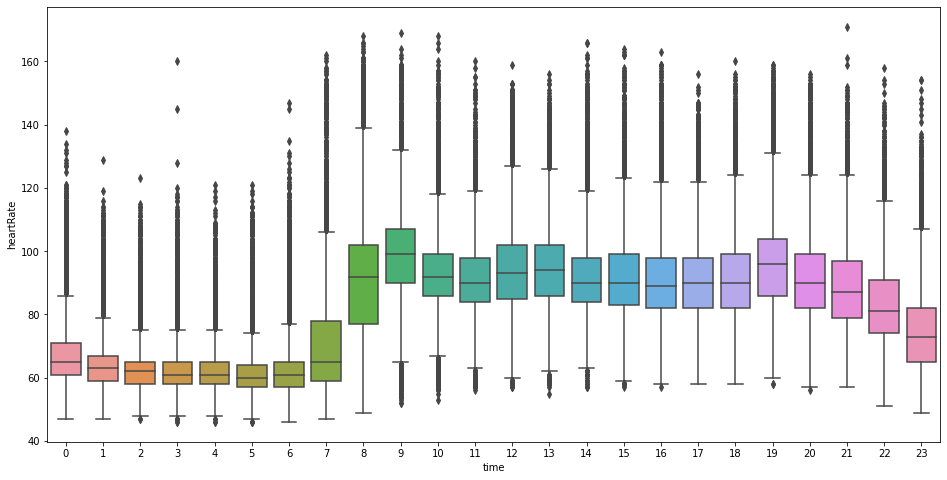

In [229]:
plt.figure(figsize=(16,8))
sns.boxplot(x=hr.time, y=hr.heartRate)

In [237]:
dfdd = df.groupby(['time']).agg({'heartRate':'mean'}).rolling(window=3).mean().reset_index()
dfdd = dfdd.rename(columns={'heartRate':'mean'})

In [238]:
dfdd['min'] = df.groupby(['time']).agg({'heartRate':'min'}).rolling(window=10).mean().reset_index().heartRate
dfdd['max'] = df.groupby(['time']).agg({'heartRate':'max'}).rolling(window=10).mean().reset_index().heartRate
dfdd['median'] = df.groupby(['time']).agg({'heartRate':'median'}).rolling(window=3).mean().reset_index().heartRate
dfdd

,time,mean,min,max,median
0,00:00,NaN,NaN,NaN,NaN
1,00:01,NaN,NaN,NaN,NaN
2,00:02,70.121207,NaN,NaN,67.000000
3,00:03,70.128091,NaN,NaN,67.000000
4,00:04,69.997695,NaN,NaN,67.000000
...,...,...,...,...,...
1435,23:55,70.596008,51.5,124.9,68.000000
1436,23:56,70.589170,51.7,123.4,68.000000
1437,23:57,70.572664,51.9,123.2,68.000000
1438,23:58,70.429313,51.9,124.8,68.000000


In [239]:
dfdd = dfdd.melt(id_vars=['time'], value_vars=['mean', 'min', 'max', 'median'])

In [240]:
dfdd = dfdd.rename(columns={'variable':'function'})
dfdd

,time,function,value
0,00:00,mean,NaN
1,00:01,mean,NaN
2,00:02,mean,70.121207
3,00:03,mean,70.128091
4,00:04,mean,69.997695
...,...,...,...
5755,23:55,median,68.000000
5756,23:56,median,68.000000
5757,23:57,median,68.000000
5758,23:58,median,68.000000


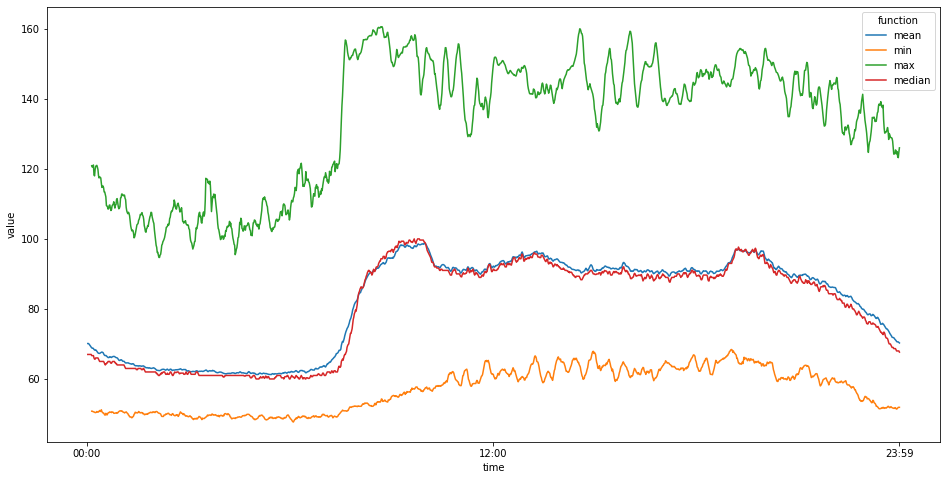

In [241]:
plt.figure(figsize=(16,8))
sns.lineplot(x=dfdd.time, y=dfdd.value, hue=dfdd.function)
plt.xticks([0, 720, 1439], [dfdd.time[0],dfdd.time[720], dfdd.time[1439]])
plt.show()